In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df_train = pd.read_csv(r"/kaggle/input/house-prices-advanced-regression-techniques/train.csv", sep=",")

df_test = pd.read_csv(r"/kaggle/input/house-prices-advanced-regression-techniques/test.csv", sep=",")

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


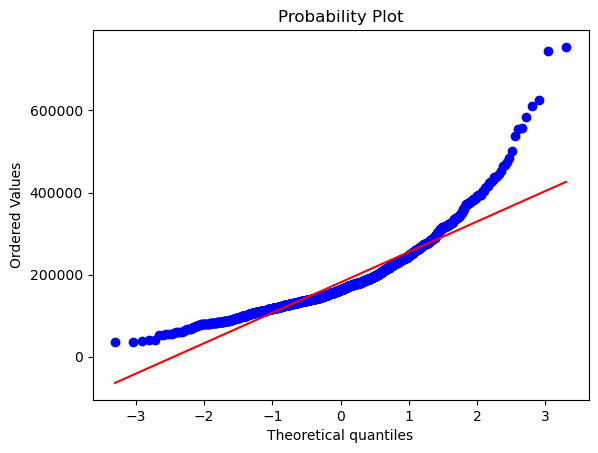

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Análisis exploratorio del comportamiento del target

figura = plt.figure()
ax = figura.add_subplot(111) 
stats.probplot(df_train['SalePrice'], dist='norm', plot=plt) 
plt.show()

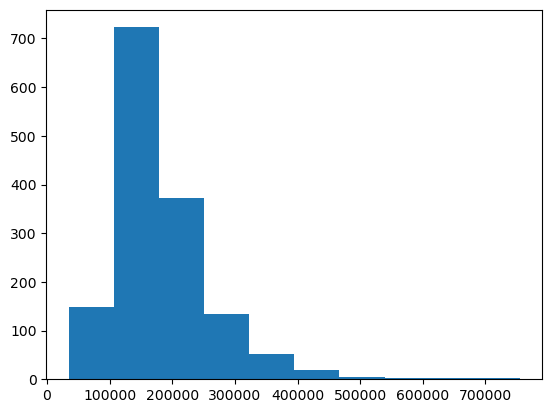

In [4]:
plt.hist(df_train['SalePrice'], bins=10)
plt.show()

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

* 3 variables **float**: LotFrontage, MasVnrArea, GarageYrBlt
* 35 variables **int64**
* 43 variables **object/cualitativas**: son muchas, mucho ojo aquí.


In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# valores duplicados

df_train.duplicated().sum()

0

In [8]:
pd.set_option('display.max_rows', 10)

total = df_train.isnull().sum().sort_values(ascending=False)
percent_1 = df_train.isnull().sum()/df_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data 

,Total,%
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
...,...,...
ExterQual,0,0.0
Exterior2nd,0,0.0
Exterior1st,0,0.0
RoofMatl,0,0.0


PoolQC	1453	99.5
MiscFeature	1406	96.3
Alley	1369	93.8
Fence	1179	80.8

¿serán faltantes o más ingresados? ¿el nulo significará 0?

* Luego de leer la documentación veo que en la varianle PoolQC el valos Naan significa que No tiene

* MiscFeature el valor faltante significa que tiene. Sin embargo esta es una variable muy poco informativa. Eliminar

* Alley. No sé precisar la utilidad. seguir investigando

* Fence. Nulo significa que no tiene vallas. Por el momento dejar

Por más que los nulos indiquen valor 0, al tener porcentajes superiores al 80% vemos que la variable cuenta con la mayoría de los datos agrupados en un único valor, por lo tanto no puede aportar valor predictivo. 

In [9]:
df_train = df_train.drop("PoolQC", axis=1)
df_train = df_train.drop("MiscFeature", axis=1)
df_train = df_train.drop("Alley", axis=1)
df_train = df_train.drop("Fence", axis=1)

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
# Creo un dataframe solo con las variables numéricas para poder graficar los boxplot y analizar si existen outliers

df_numeric = df_train.select_dtypes(include=[float, int])

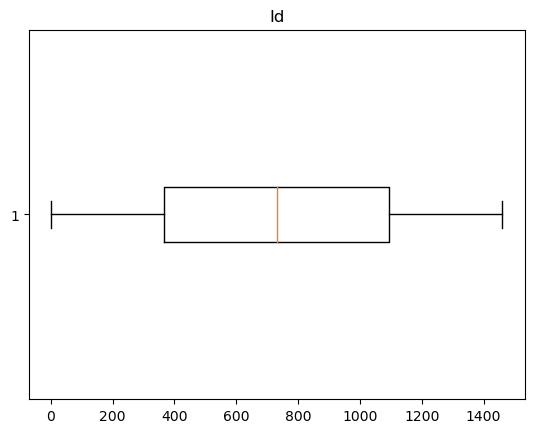

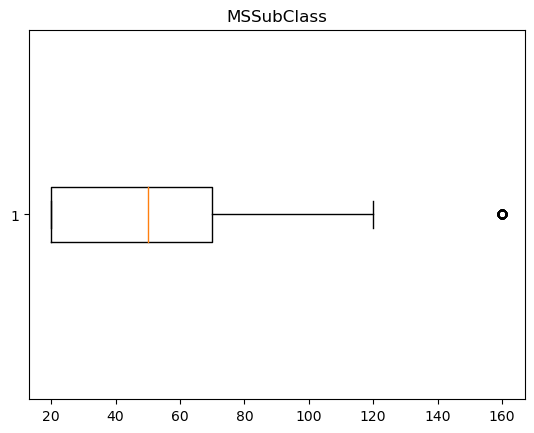

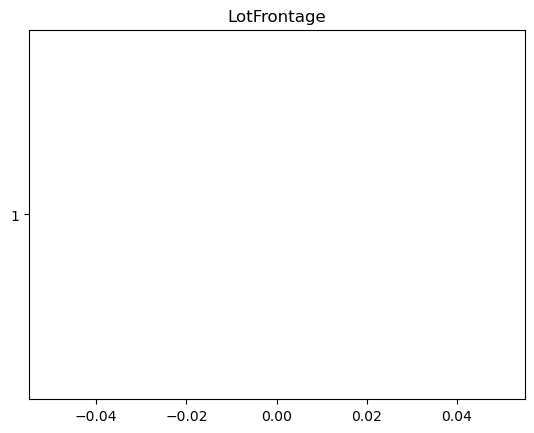

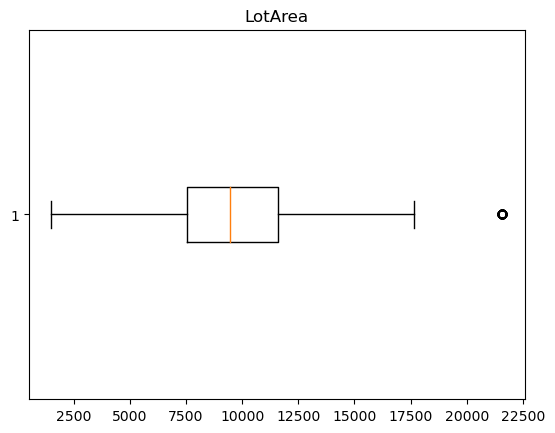

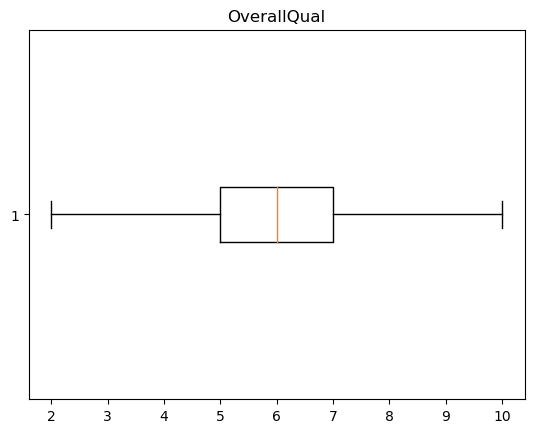

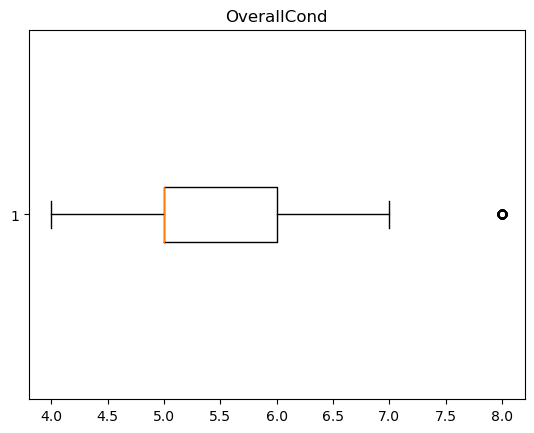

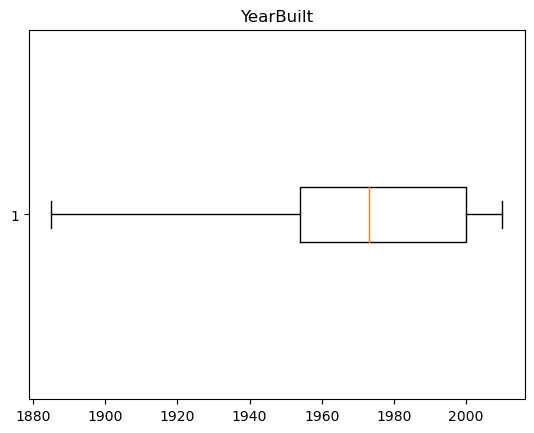

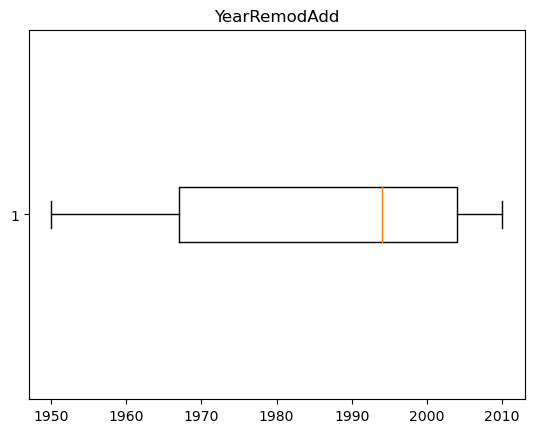

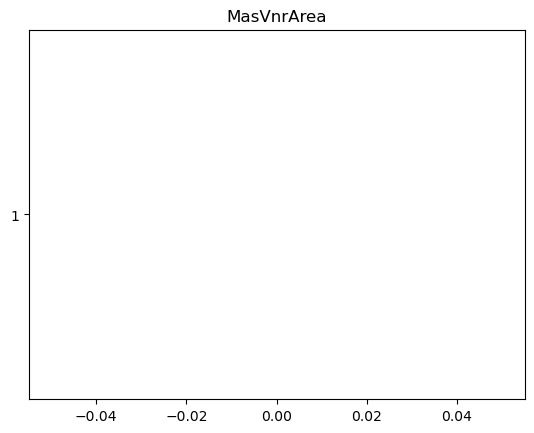

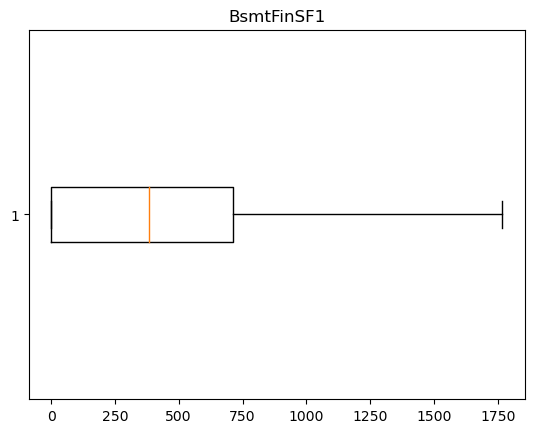

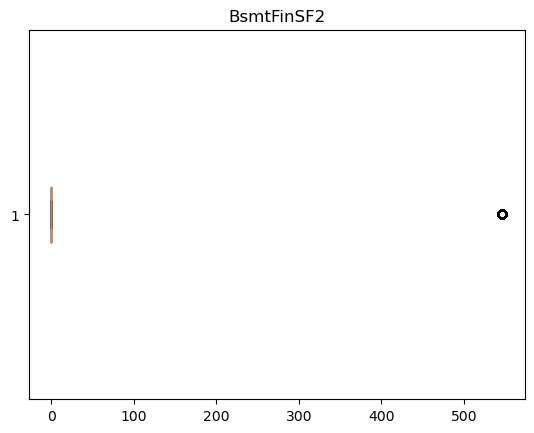

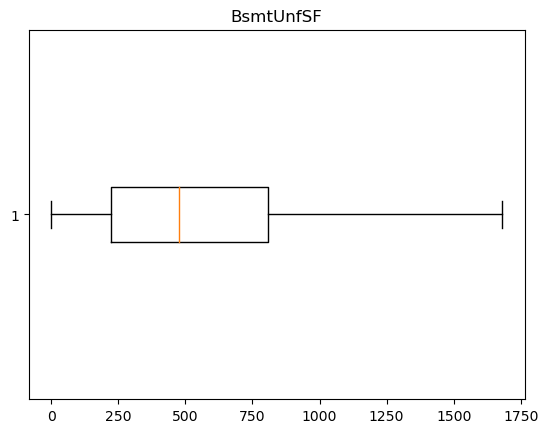

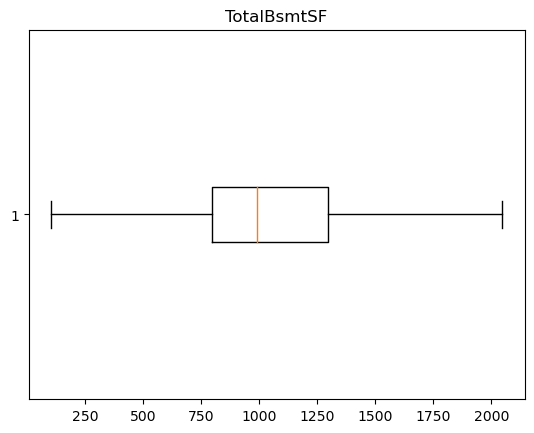

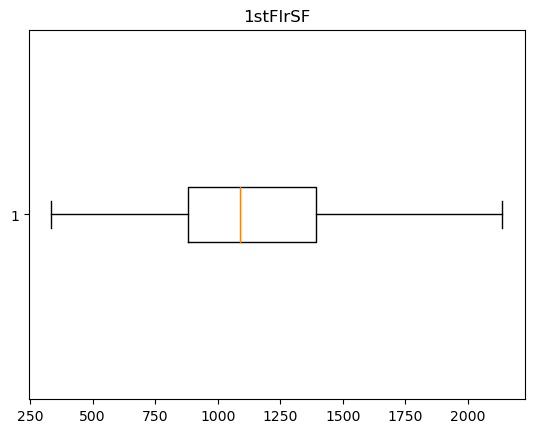

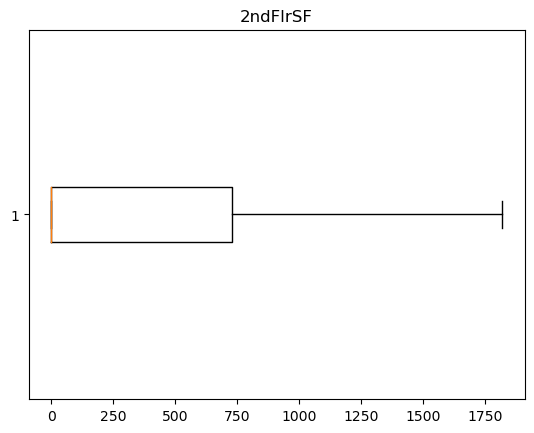

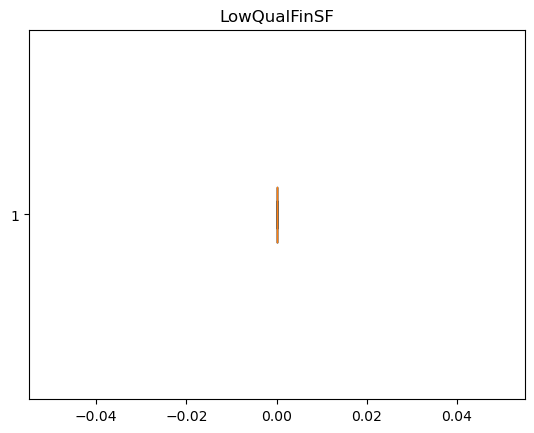

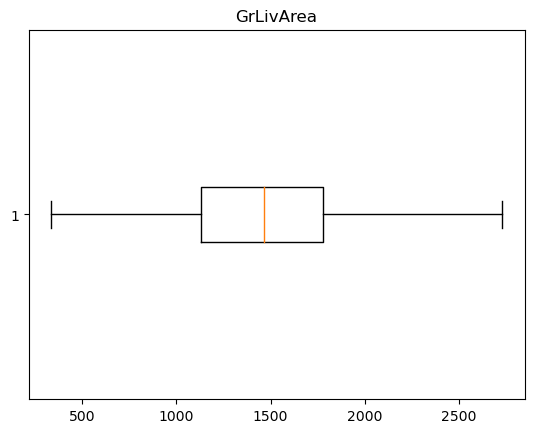

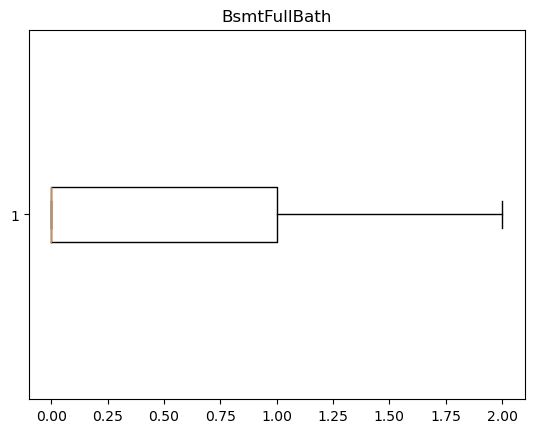

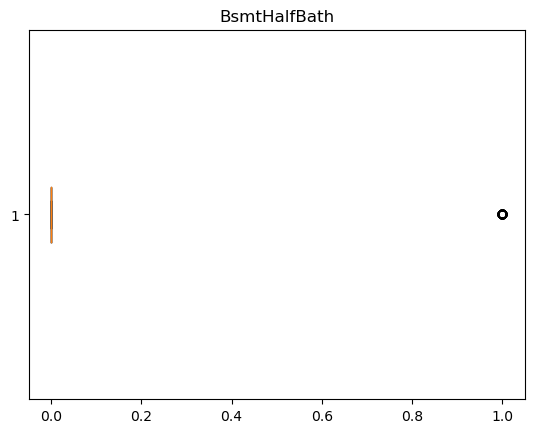

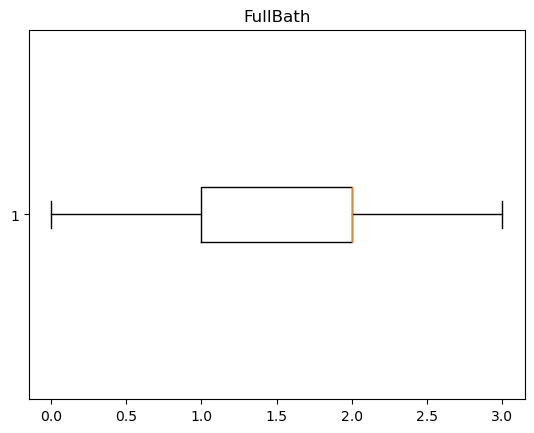

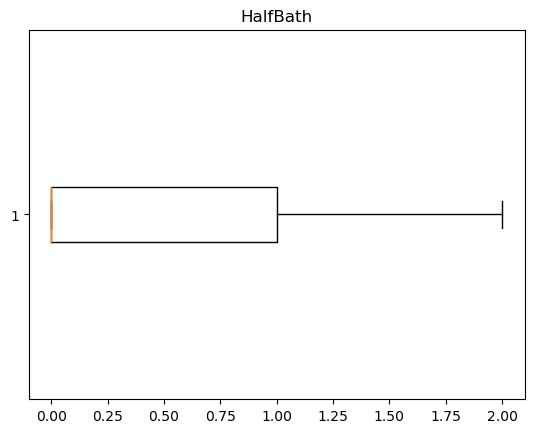

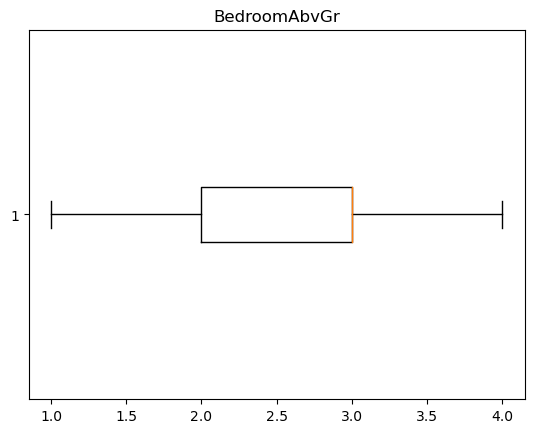

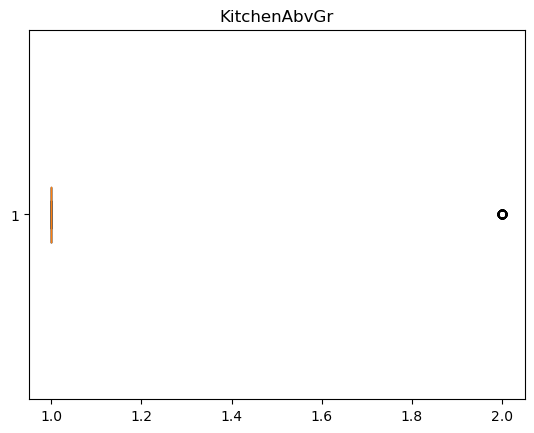

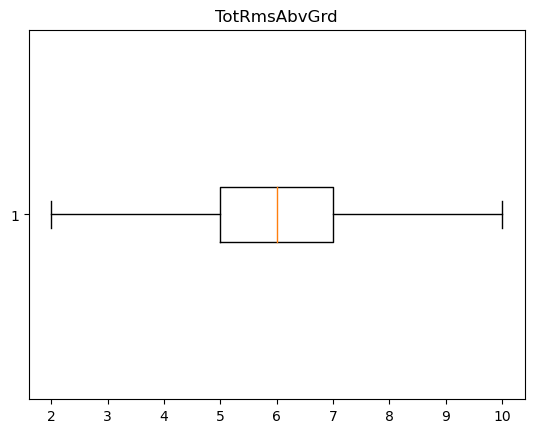

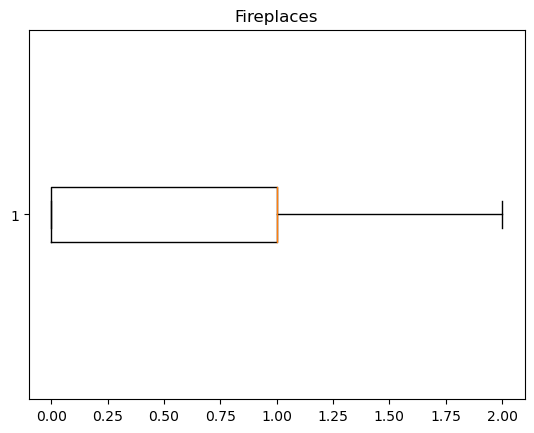

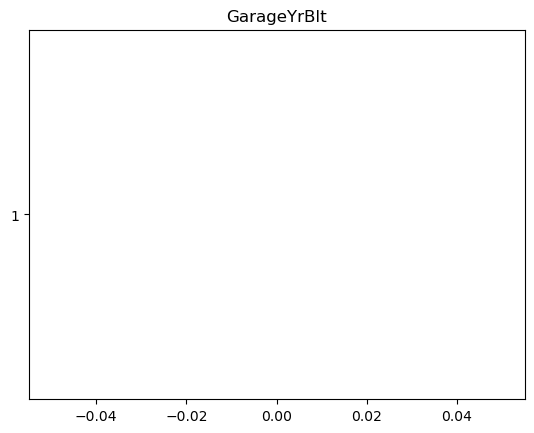

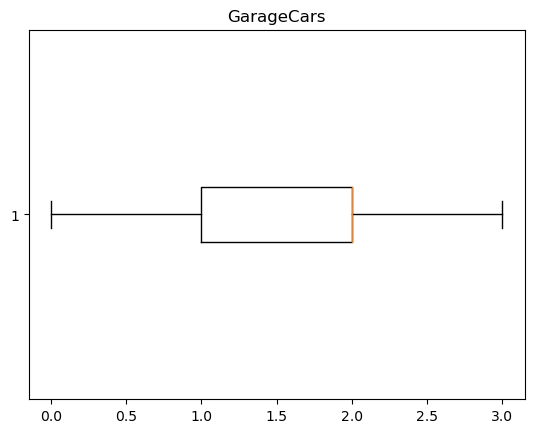

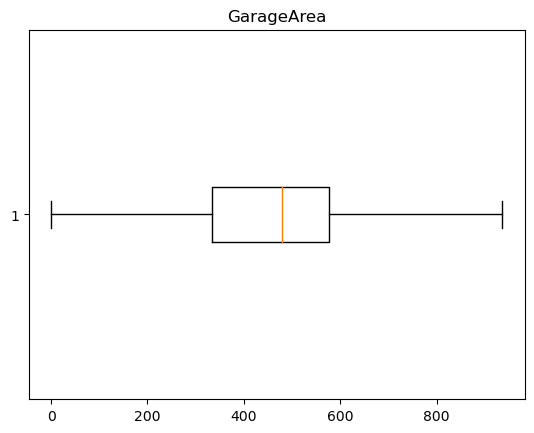

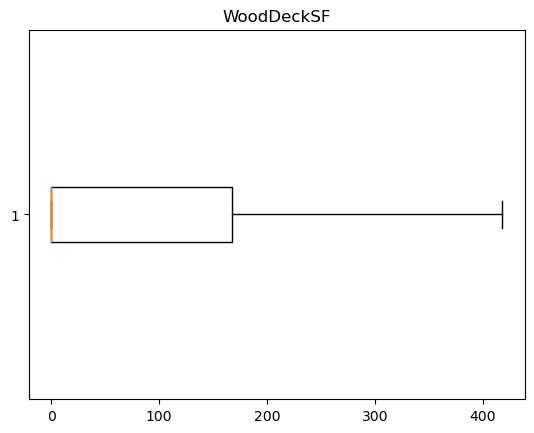

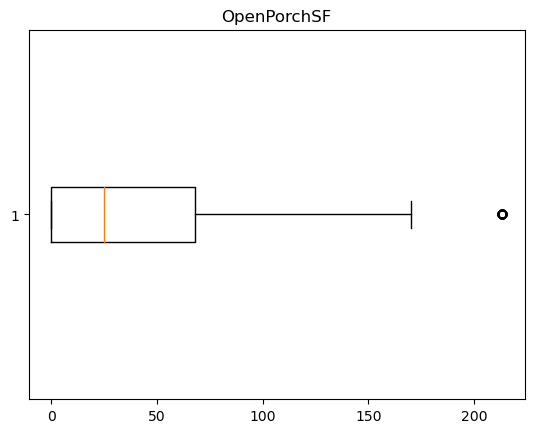

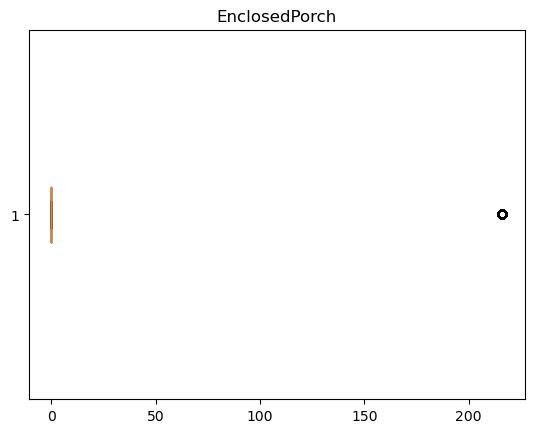

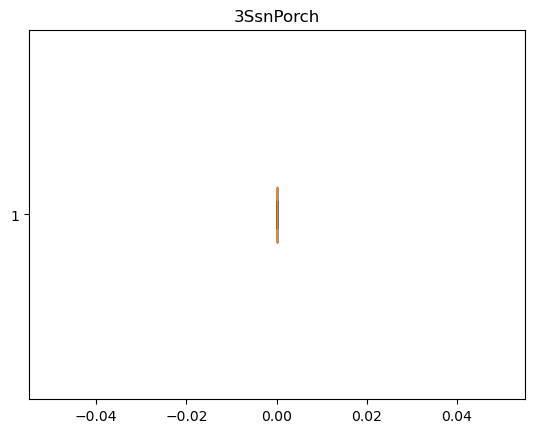

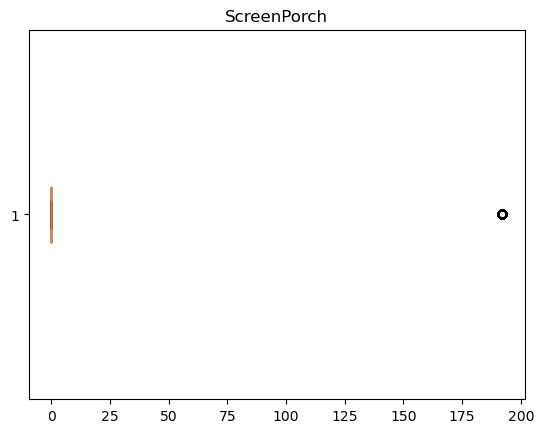

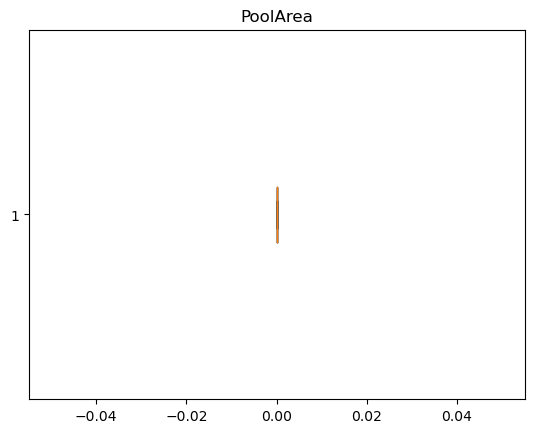

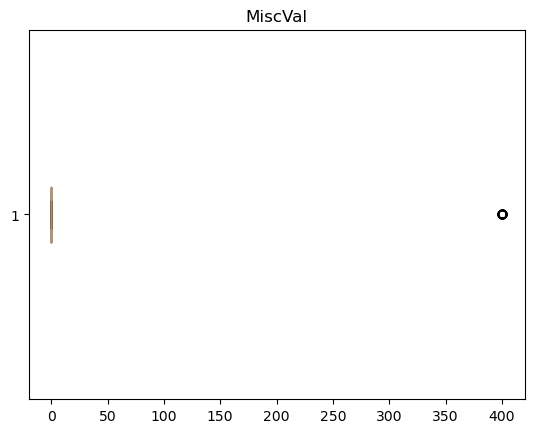

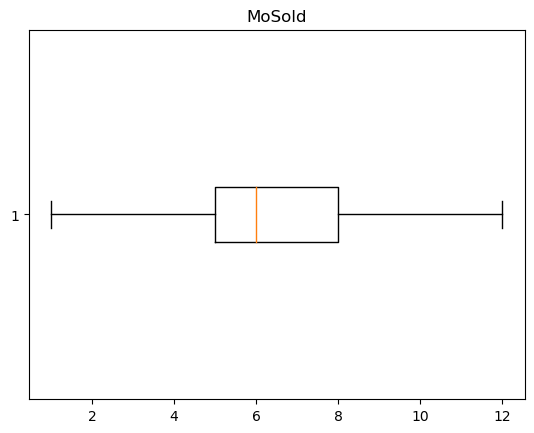

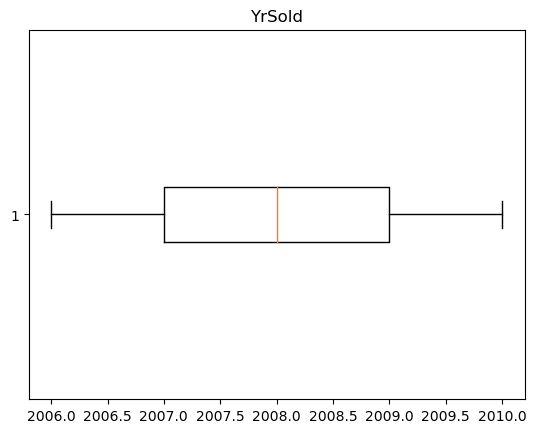

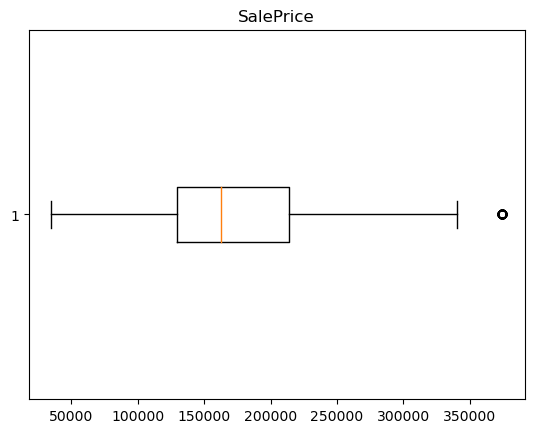

In [11]:
# Outliers

import matplotlib.pyplot as plt

def procesar_columna(df, nombre_columna):
    Q3 = np.percentile(df[nombre_columna], 75)
    Q1 = np.percentile(df[nombre_columna], 25)
    RI = Q3 - Q1

    limite_superior = Q3 + 1.5 * RI
    limite_inferior = Q1 - 1.5 * RI

    df[nombre_columna] = np.where(df[nombre_columna] > limite_superior, 
                                  np.percentile(df[nombre_columna], 97),
                                  df[nombre_columna])

    df[nombre_columna] = np.where(df[nombre_columna] < limite_inferior, 
                                  np.percentile(df[nombre_columna], 5),
                                  df[nombre_columna])
    return df[nombre_columna]


variables_outlier = df_numeric.columns


for col in variables_outlier:
    df_train[col] = procesar_columna(df_train, col)
    
def show_grafico_caja(df, nombre_columna):
    datos = df[[nombre_columna]]
    plt.boxplot(datos, vert=False)
    plt.title(nombre_columna)
    plt.show()
    
    
for col in variables_outlier:
    show_grafico_caja(df_train, col)

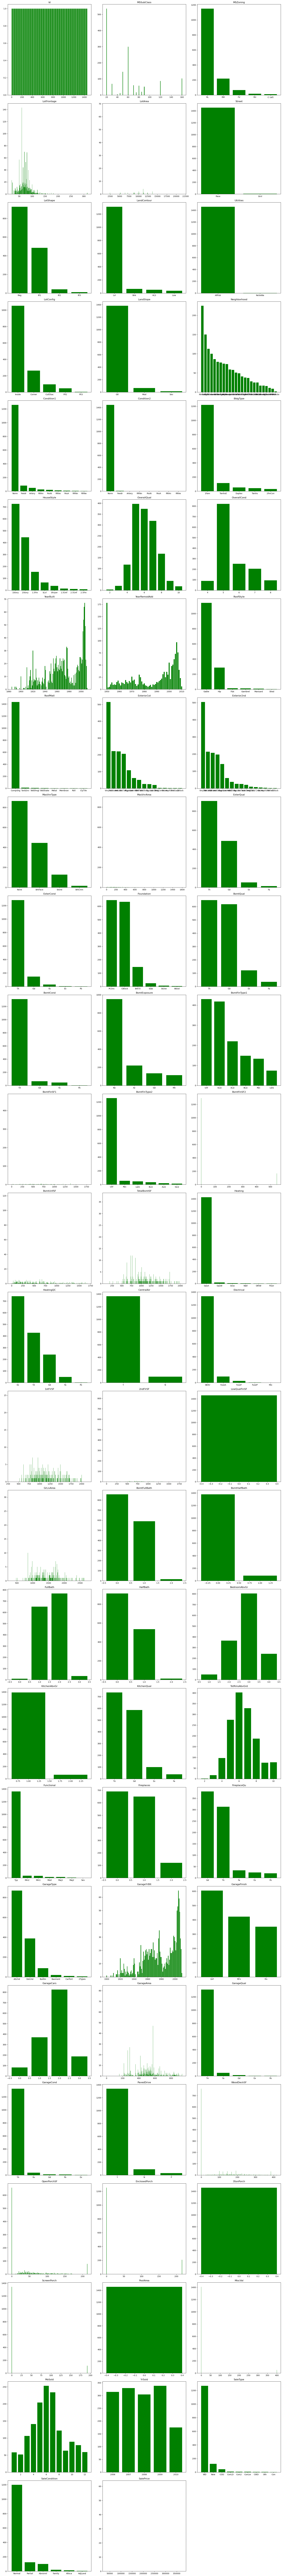

In [12]:
import math

num_columns = len(df_train.columns)
num_rows = math.ceil(num_columns / 3)

fig = plt.figure(figsize=(20, 7 * num_rows))

for i, column in enumerate(df_train.columns):
    ax = fig.add_subplot(num_rows, 3, i+1)
    ax.bar(df_train[column].value_counts().index, df_train[column].value_counts(), color='green')
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [13]:
df_train = df_train.drop('YrSold', axis=1)
df_train = df_train.drop('MoSold', axis=1)

df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,0.00,61.0,0.0,0.0,0.0,0.0,0.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,298.00,0.0,0.0,0.0,0.0,0.0,0.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,0.00,42.0,0.0,0.0,0.0,0.0,0.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,0.00,35.0,216.0,0.0,0.0,0.0,0.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,192.00,84.0,0.0,0.0,0.0,0.0,0.0,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,...,0.00,40.0,0.0,0.0,0.0,0.0,0.0,WD,Normal,175000.0
1456,1457.0,20.0,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,...,349.00,0.0,0.0,0.0,0.0,0.0,0.0,WD,Normal,210000.0
1457,1458.0,70.0,RL,66.0,9042.0,Pave,Reg,Lvl,AllPub,Inside,...,0.00,60.0,0.0,0.0,0.0,0.0,400.0,WD,Normal,266500.0
1458,1459.0,20.0,RL,68.0,9717.0,Pave,Reg,Lvl,AllPub,Inside,...,366.00,0.0,216.0,0.0,0.0,0.0,0.0,WD,Normal,142125.0


### Primera selección de variables numéricas

In [14]:
# Eliminación de columnas débilmente relacionadas con la target

correlation = df_numeric.corr()
corr_target = correlation['SalePrice'].sort_values(ascending = False)
corr_target = pd.DataFrame(corr_target)

pd.set_option('display.max_rows', None)
corr_target

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [15]:
columns_drop = ['WoodDeckSF','2ndFlrSF','OpenPorchSF','HalfBath','LotArea','BsmtFullBath','BsmtUnfSF','BedroomAbvGr','ScreenPorch','PoolArea','3SsnPorch','BsmtFinSF2','BsmtHalfBath','MiscVal','LowQualFinSF','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr']
df_train = df_train.drop(columns= columns_drop, axis = 1)
pd.set_option('display.max_rows', 5)

df_train

,Id,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,1.0,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2003.0,RFn,2.0,548.0,TA,TA,Y,WD,Normal,208500.0
1,2.0,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,1976.0,RFn,2.0,460.0,TA,TA,Y,WD,Normal,181500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,1459.0,RL,68.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,1950.0,Unf,1.0,240.0,TA,TA,Y,WD,Normal,142125.0
1459,1460.0,RL,75.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,...,1965.0,Fin,1.0,276.0,TA,TA,Y,WD,Normal,147500.0


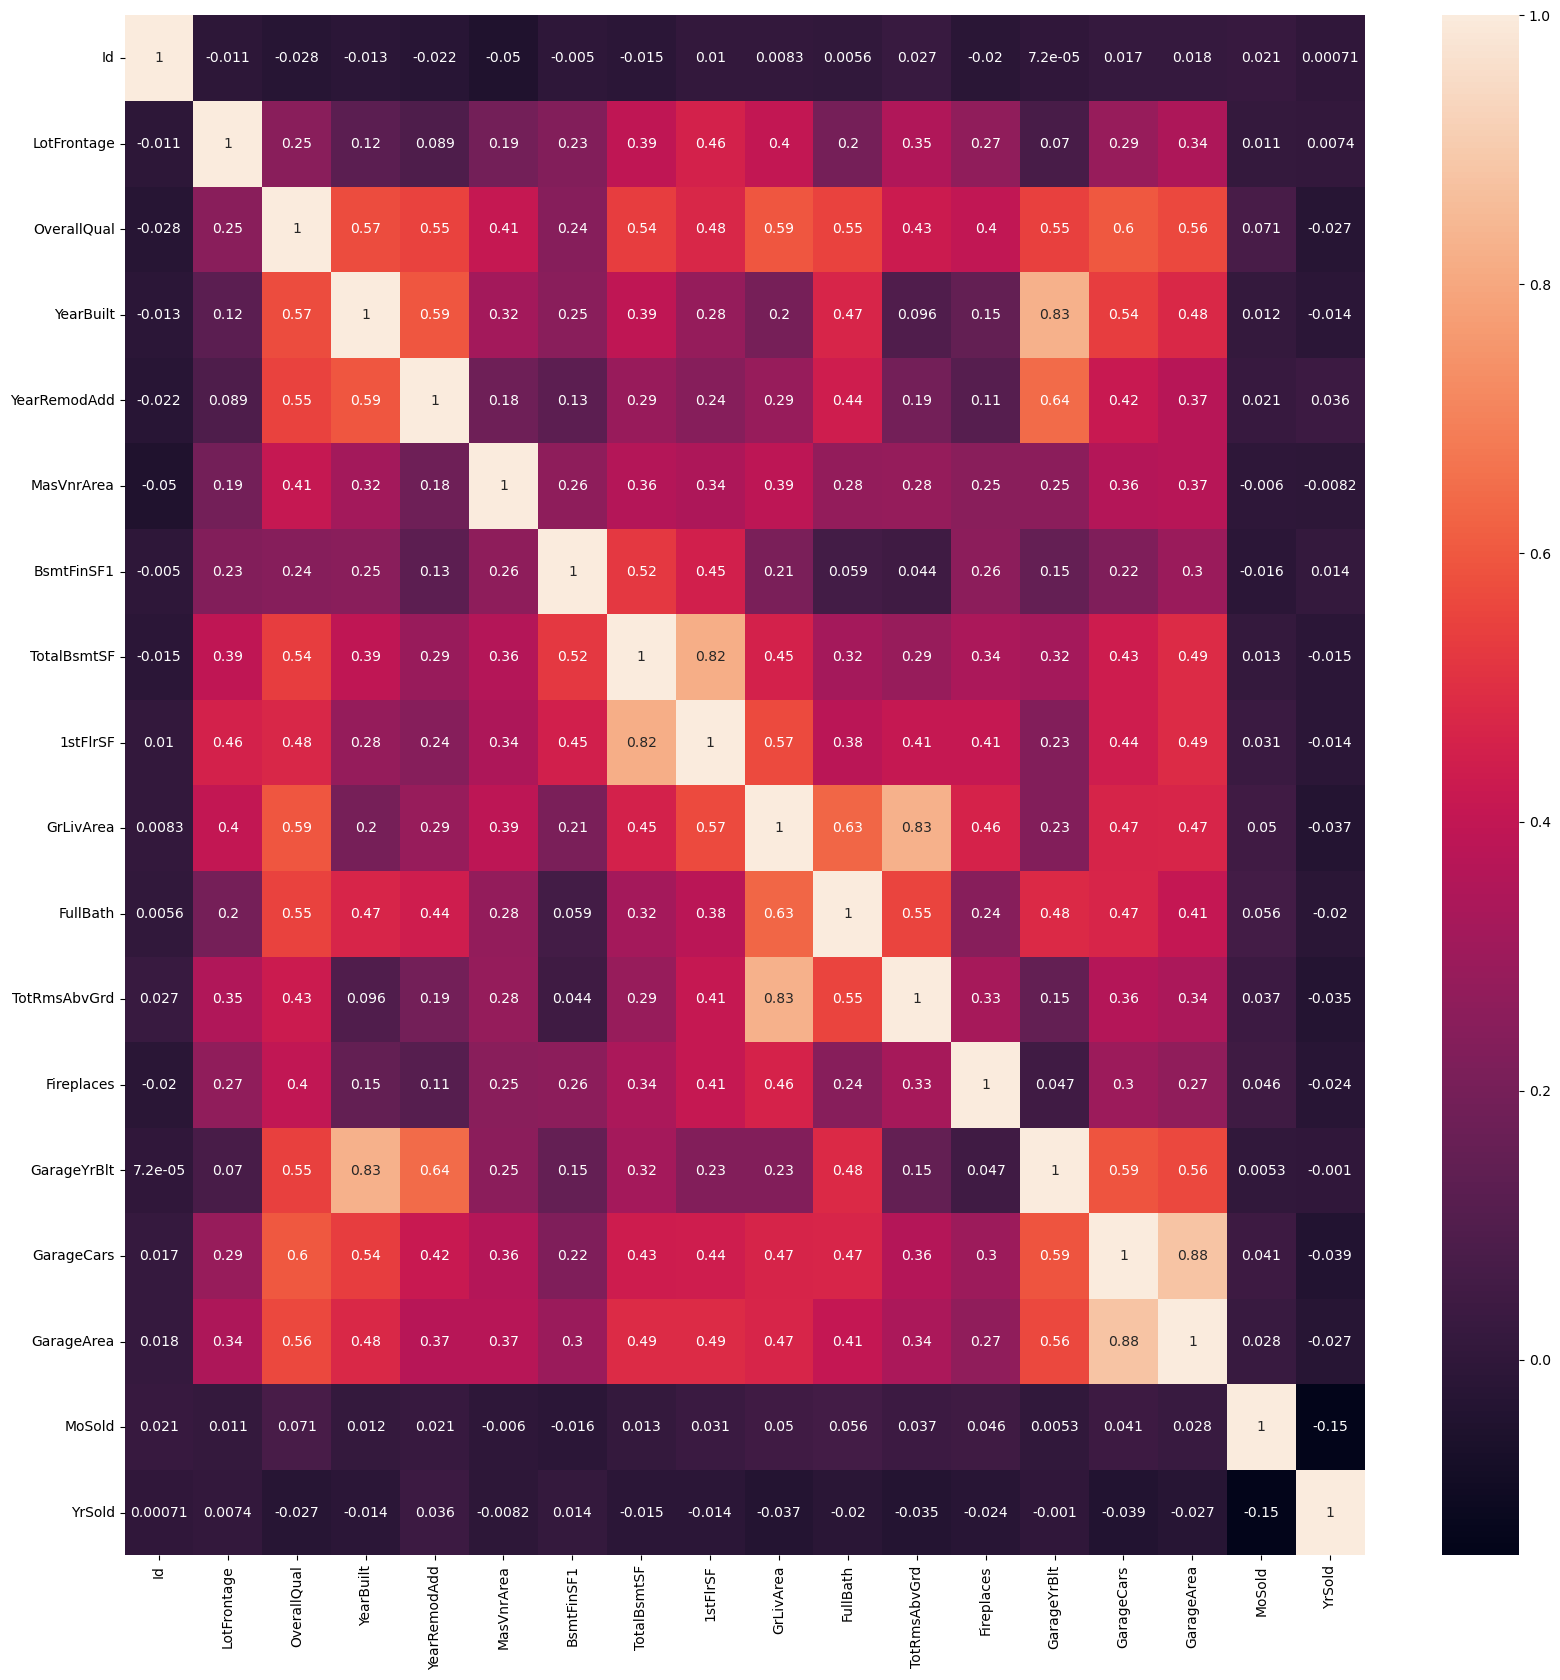

In [16]:
# Búsqueda de variables con alta colinealidad

import seaborn as sns

df_numeric = df_numeric.drop(columns= columns_drop, axis = 1)
df_numeric = df_numeric.drop('SalePrice', axis = 1)

plt.figure(figsize = (20,20)) 
sns.heatmap(df_numeric.corr(), annot=True) 
plt.show()

Variables colineales: 
1. YearBuilt - GarageYBlt
2. GarageCars - GarageArea
3. TotRmaAvgrd- GrLivArea
4. TotalBsmtSf - 1stflrsf
5. Fullbath - GirLivArea
5. GarageYBlt - YearRemodAdd

Elimino GarageYrBlt, GarageArea, TotRmsAbvGrd, 1stFlrSF, FullBath

In [17]:
# Eliminación de variables con alta colinealidad

col_drop = ['GarageYrBlt', 'GarageArea', 'TotRmsAbvGrd', '1stFlrSF', 'FullBath']
df_train = df_train.drop(columns= col_drop, axis = 1)

df_train

,Id,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,1.0,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,NaN,Attchd,RFn,2.0,TA,TA,Y,WD,Normal,208500.0
1,2.0,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,Attchd,RFn,2.0,TA,TA,Y,WD,Normal,181500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,1459.0,RL,68.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,NaN,Attchd,Unf,1.0,TA,TA,Y,WD,Normal,142125.0
1459,1460.0,RL,75.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,...,NaN,Attchd,Fin,1.0,TA,TA,Y,WD,Normal,147500.0


### Primera eliminación de variables categóricas

In [18]:
lis_var_cat = df_train.select_dtypes(object)

#lis_var_cat = lis_var_cat.columns

lis_var_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [19]:
elim_cat_1 = np.array(['LandContour', 'LandSlope', 'Condition2','RoofStyle', 'RoofMatl', 'Exterior2nd', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'Functional', 'FireplaceQu', 'GarageType', 'GarageQual'])
elim_cat_2 = np.array(['Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'GarageQual', 'Heating', 'HouseStyle', 'RoofMatl', 'Utilities'])

elim_cat = np.concatenate((elim_cat_1,elim_cat_2))

elim_cat = np.unique(elim_cat)

print(len(elim_cat))
print(elim_cat)

22
['BsmtCond' 'BsmtExposure' 'BsmtFinType2' 'BsmtQual' 'Condition2'
 'Electrical' 'ExterQual' 'Exterior1st' 'Exterior2nd' 'FireplaceQu'
 'Foundation' 'Functional' 'GarageQual' 'GarageType' 'Heating' 'HeatingQC'
 'HouseStyle' 'LandContour' 'LandSlope' 'RoofMatl' 'RoofStyle' 'Utilities']


In [20]:
df_train = df_train.drop(elim_cat, axis=1)

var_pre_dummies = df_train.columns
var_pre_dummies

Index(['Id', 'MSZoning', 'LotFrontage', 'Street', 'LotShape', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrType', 'MasVnrArea', 'ExterCond', 'BsmtFinType1',
       'BsmtFinSF1', 'TotalBsmtSF', 'CentralAir', 'GrLivArea', 'KitchenQual',
       'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [21]:
df_train = pd.get_dummies(df_train)

df_train.head()

,Id,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,Fireplaces,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,65.0,7.0,2003.0,2003.0,196.0,706.0,856.0,1710.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,2.0,80.0,6.0,1976.0,1976.0,0.0,978.0,1262.0,1262.0,1.0,...,0,0,0,1,0,0,0,0,1,0
2,3.0,68.0,7.0,2001.0,2002.0,162.0,486.0,920.0,1786.0,1.0,...,0,0,0,1,0,0,0,0,1,0
3,4.0,60.0,7.0,1915.0,1970.0,0.0,216.0,756.0,1717.0,1.0,...,0,0,0,1,1,0,0,0,0,0
4,5.0,84.0,8.0,2000.0,2000.0,350.0,655.0,1145.0,2198.0,1.0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
# Calcula el valor medio de la columna
valor_medio = df_train["LotFrontage"].mean()

# Imputa los valores medios a los datos faltantes en la columna
df_train["LotFrontage"].fillna(valor_medio, inplace=True)

valor_medio2 = df_train["MasVnrArea"].mean()

# Imputa los valores medios a los datos faltantes en la columna
df_train["MasVnrArea"].fillna(valor_medio2, inplace=True)

df_train.isnull().sum()

Id                       0
LotFrontage              0
                        ..
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 114, dtype: int64

In [23]:
correlation = df_train.corr()
corr_target = correlation['SalePrice'].sort_values(ascending = False)
corr_target = pd.DataFrame(corr_target)
pd.set_option('display.max_rows', 50)

corr_target

,SalePrice
SalePrice,1.000000
OverallQual,0.813783
GrLivArea,0.724912
GarageCars,0.674066
TotalBsmtSF,0.652790
...,...
LotShape_Reg,-0.275759
MSZoning_RM,-0.313169
MasVnrType_None,-0.393287
GarageFinish_Unf,-0.436165


## SELECCIÓN DE VARIABLES MEDIANTE DIFERENTES TÉCNICAS

In [24]:
# Técnica feature importance

df = df_train.copy()

target_labels = ['SalePrice']
pred_labels = df.columns.to_list()
pred_labels = [label for label in pred_labels if label not in target_labels]

# Construimos el conjunto de datos predictor y el conjunto objetivo:
X = df[pred_labels]
y = df[target_labels]

df.isnull().sum()

Id                       0
LotFrontage              0
OverallQual              0
YearBuilt                0
YearRemodAdd             0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 114, dtype: int64

In [25]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

resultados = {}  # Diccionario para almacenar los resultados

for i, e in zip(X.columns, model.feature_importances_):
    resultados[i] = e

# Ordenar los resultados de mayor a menor
resultados_ordenados = dict(sorted(resultados.items(), key=lambda x: x[1], reverse=True))

# Imprimir los resultados ordenados
for i, e in resultados_ordenados.items():
    print(f"{i}: {e}")

/tmp/ipykernel_21/4137926719.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


Id: 0.058416595555558955
GrLivArea: 0.05817006438486502
TotalBsmtSF: 0.05440074108786539
YearBuilt: 0.04999362556718362
LotFrontage: 0.048988839246029946
YearRemodAdd: 0.048203510551241315
BsmtFinSF1: 0.04526861528657756
OverallQual: 0.03726114235294767
MasVnrArea: 0.029886734169579796
Fireplaces: 0.02464710308421926
GarageCars: 0.023763372976253604
LotConfig_Inside: 0.0182611522476612
BsmtFinType1_Unf: 0.015953266832216432
LotConfig_Corner: 0.014934885383002855
LotShape_IR1: 0.01439859934456662
LotShape_Reg: 0.014113019324768827
MasVnrType_None: 0.014088716105843951
MasVnrType_BrkFace: 0.013684684789521513
GarageFinish_RFn: 0.013513802325478563
BsmtFinType1_GLQ: 0.013150609016448963
BsmtFinType1_ALQ: 0.012755132435063248
Condition1_Norm: 0.012348531761607147
GarageFinish_Unf: 0.012138987484729009
GarageFinish_Fin: 0.011601799232137944
ExterCond_TA: 0.011081118308130744
BsmtFinType1_BLQ: 0.010846669702828273
SaleCondition_Normal: 0.01068733994591645
KitchenQual_Gd: 0.010597348975962444

Esta técnica selecciona los valores: **GrLivArea,TotalBsmtSF,YearBuilt,LotFrontage,YearRemodAdd,BsmtFinSF1,OverallQual**

In [26]:
# Regularización de Lasso
from sklearn.linear_model import Lasso

#Generamos un objeto Lasso
reg = Lasso(alpha = 0.5)

#Entrenamos el modelo con los datos
reg.fit(X, y)

#Calculamos la puntuación del modelo
score = reg.score(X, y)

#Mostramos los resultados
print("Coeficientes: \n", reg.coef_)
print("Término independiente:", reg.intercept_)
print("Puntuación del modelo:", score)

Coeficientes: 
 [-1.77391921e+00 -3.26667302e+01  9.15460726e+03  1.21636918e+02
  1.87742030e+02  3.55389698e+00  1.79081014e+01  2.22731520e+01
  4.61288263e+01  4.23649198e+03  1.13729658e+04 -2.42276900e+04
  4.09399518e+03  3.34258323e+03 -0.00000000e+00 -3.66648378e+03
 -7.20733475e+03  1.28140078e-10 -4.46890240e+02  8.45709759e+03
  2.51943943e+00 -1.78778517e+02  8.89224620e+02  7.39424316e+03
 -5.63922705e+03 -1.87616843e+04 -0.00000000e+00 -2.98374218e+03
  1.15585668e+03  6.38855540e+03 -0.00000000e+00  8.01173871e+03
 -5.03114782e+03  2.15726780e+04 -1.45691329e+04 -8.35986105e+03
 -2.83838872e+03  5.18973907e+02 -1.24560321e+04 -7.83672694e+03
  3.07479337e+03 -1.06196051e+04  2.57384946e+04  2.97194730e+04
 -1.30446250e+04 -1.26685206e+04 -7.40580001e+03 -5.02523269e+03
  7.65336371e+03  2.97767587e+04  5.66252461e+03  2.58923010e+04
 -0.00000000e+00 -3.33871224e+03  6.52140831e+03  6.84254367e+03
 -1.29512179e+03 -1.76684945e+04  1.51977131e+03 -4.10858245e+03
  1.74738

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.319e+10, tolerance: 7.337e+08
  model = cd_fast.enet_coordinate_descent(


In [27]:
resultados = {}  # Diccionario para almacenar los resultados

# Obtener los nombres de las variables
nombres_variables = X.columns

# Obtener los coeficientes del modelo
coeficientes = reg.coef_

# Combinar nombres de variables y coeficientes en un zip
coeficientes_variables = zip(nombres_variables, coeficientes)

for variable, coeficiente in coeficientes_variables:
    resultados[variable] = coeficiente

# Ordenar los resultados de mayor a menor según el valor del coeficiente
resultados_ordenados = dict(sorted(resultados.items(), key=lambda x: x[1], reverse=True))

# Imprimir los resultados ordenados
for variable, coeficiente in resultados_ordenados.items():
    print("Variable:", variable, "Coeficiente:", coeficiente)

Variable: ExterCond_Ex Coeficiente: 38561.97554296927
Variable: Neighborhood_StoneBr Coeficiente: 29776.75872283051
Variable: Neighborhood_NridgHt Coeficiente: 29719.47298360957
Variable: Neighborhood_Veenker Coeficiente: 25892.300957259442
Variable: Neighborhood_NoRidge Coeficiente: 25738.494590673123
Variable: MasVnrType_Stone Coeficiente: 22956.43682092197
Variable: KitchenQual_Ex Coeficiente: 22948.598282388095
Variable: MasVnrType_None Coeficiente: 22800.896784132783
Variable: SaleCondition_AdjLand Coeficiente: 22593.15562569516
Variable: MasVnrType_BrkFace Coeficiente: 21981.802752055442
Variable: BldgType_1Fam Coeficiente: 21939.854053717827
Variable: SaleType_New Coeficiente: 21672.01300639478
Variable: Neighborhood_Crawfor Coeficiente: 21572.678012825963
Variable: SaleCondition_Alloca Coeficiente: 18327.41555641896
Variable: SaleType_Con Coeficiente: 17572.199150507473
Variable: Condition1_RRNn Coeficiente: 17473.89012475153
Variable: BldgType_2fmCon Coeficiente: 14878.3586389

Lasso indica que muy pocas variables tienen poca importancia al modelo

In [28]:
#Selección por árbol de decisión

from sklearn.tree import DecisionTreeClassifier

# Entrenar el modelo de árbol de decisión
modelo_arbol = DecisionTreeClassifier()
modelo_arbol.fit(X, y)

importancia_variables = modelo_arbol.feature_importances_

df_importancia = pd.DataFrame({'Variable': X.columns, 'Puntuacion': importancia_variables})
df_importancia = df_importancia.sort_values('Puntuacion', ascending=False)


df_importancia

,Variable,Puntuacion
0,Id,0.075198
8,GrLivArea,0.070642
7,TotalBsmtSF,0.061199
4,YearRemodAdd,0.060249
1,LotFrontage,0.054997
...,...,...
93,GarageCond_Po,0.000000
29,Neighborhood_BrDale,0.000000
90,GarageCond_Ex,0.000000
73,ExterCond_Po,0.000000


La importancia de variables para el árbol de decisión es: **GrLivArea, YearRemodAdd, TotalBsmtSF,BsmtFinSF1,YearBuilt**

# IMPLEMENTACIÓN DE DIFERENTES MODELOS

### Regresión lineal Múltiple

In [29]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Subdividimos el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Creamos el modelo de regresión lineal
reg = LinearRegression().fit(X_train,y_train) 

# Evaluamos el error

# Realizar predicciones en el conjunto de prueba
y_pred = reg.predict(X_test)

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Calcular el MAE
mean= mean_absolute_error(y_test, y_pred)
print("MEAN:", mean)

# Calcular el coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

MSE: 552657855.8193381
MEAN: 16962.34116498727
R²: 0.8932332582335547


### XG BOOST

In [30]:
from xgboost import XGBRegressor


#Creamos una instancia con XGBClassifier
model_XGB = XGBRegressor(n_estimators=30, max_depth=2, learning_rate=.2, random_state=42)

#Entrenamos el modelo con los datos de entrenamiento
model_XGB.fit(X_train,y_train)

#Creamos el conjunto de entrenamiento
prediction_XGB = model_XGB.predict(X_test)

#Calculamos la puntuación con el conjunto de entrenamiento
scoreR2_XGB = r2_score(y_test, prediction_XGB)

print("Puntuación:", scoreR2_XGB)

Puntuación: 0.9001619365001794


*Variables importantes para el modelo XGB*

In [31]:
# Obtén la importancia de las variables
importance = model.feature_importances_

# Asocia las importancias con los nombres de las variables
feature_names = list(X_train.columns)
feature_importance = dict(zip(feature_names, importance))

# Ordena las variables según su importancia
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Imprime las variables y su importancia en orden descendente
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")

Id: 0.058416595555558955
GrLivArea: 0.05817006438486502
TotalBsmtSF: 0.05440074108786539
YearBuilt: 0.04999362556718362
LotFrontage: 0.048988839246029946
YearRemodAdd: 0.048203510551241315
BsmtFinSF1: 0.04526861528657756
OverallQual: 0.03726114235294767
MasVnrArea: 0.029886734169579796
Fireplaces: 0.02464710308421926
GarageCars: 0.023763372976253604
LotConfig_Inside: 0.0182611522476612
BsmtFinType1_Unf: 0.015953266832216432
LotConfig_Corner: 0.014934885383002855
LotShape_IR1: 0.01439859934456662
LotShape_Reg: 0.014113019324768827
MasVnrType_None: 0.014088716105843951
MasVnrType_BrkFace: 0.013684684789521513
GarageFinish_RFn: 0.013513802325478563
BsmtFinType1_GLQ: 0.013150609016448963
BsmtFinType1_ALQ: 0.012755132435063248
Condition1_Norm: 0.012348531761607147
GarageFinish_Unf: 0.012138987484729009
GarageFinish_Fin: 0.011601799232137944
ExterCond_TA: 0.011081118308130744
BsmtFinType1_BLQ: 0.010846669702828273
SaleCondition_Normal: 0.01068733994591645
KitchenQual_Gd: 0.010597348975962444

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

#Creamos una instancia con RandomForestClassifier
model_random = RandomForestClassifier(n_estimators = 100, max_depth=3, random_state = 42)

#Entrenamos el modelo con los datos de entrenamiento
model_random = model_random.fit(X_train,y_train)
predicted_random = model_random.predict(X_test)

#Calculamos la puntuación con el conjunto de entrenamiento
scoreR2_random = r2_score(y_test, predicted_random)

print("Puntuación:", scoreR2_random)

Puntuación: -1.4152825909330131


### Modelo Ridge

In [33]:
from sklearn.linear_model import Ridge

#Generamos un modelo Ridge
ridge = Ridge(alpha=0.1)
#Entrenamos el modelo
ridge.fit(X_train,y_train)
#Hacemos las predicciones
y_pred = ridge.predict(X_test)
#Calculamos la puntuación del modelo
score = ridge.score(X=X_test, y=y_test)
#Mostramos los resultados
print("Puntuación del modelo:",score) 
print("Coeficientes: \n", ridge.coef_) 
print("Término independiente:", ridge.intercept_)

Puntuación del modelo: 0.8940773453776134
Coeficientes: 
 [[-1.66550749e+00 -5.63094918e+01  8.83144044e+03  1.11288673e+02
   2.34879399e+02 -4.23155079e+00  1.79865892e+01  2.47772039e+01
   4.57115884e+01  5.34365461e+03  1.16683714e+04 -2.48743222e+04
   1.38966733e+04  6.29022810e+03  2.06191754e+03  2.62550326e+03
  -1.14241123e+03  1.14241123e+03 -2.04746422e+03  6.91383130e+03
  -6.59617650e+02 -4.20674943e+03  6.28735523e+03  9.96978480e+03
  -1.79658278e+03 -2.04841614e+04  6.02360417e+03 -2.82357624e+03
  -1.12889124e+04  6.25588334e+03 -5.44204882e+03  1.13182442e+04
  -7.63552231e+03  1.77495251e+04 -1.71546978e+04 -1.05924112e+04
  -9.27989312e+03 -4.02031041e+03 -1.22886660e+04 -1.06082741e+04
   6.63177004e+03 -1.13835330e+04  2.21009129e+04  2.62246815e+04
  -1.71140094e+04 -1.27619789e+04 -7.81052624e+03 -1.22747839e+04
  -1.26000647e+03  3.19371758e+04  5.45766824e+03  2.60632894e+04
  -2.84259272e+03 -5.54676167e+03  5.52789539e+03 -3.53109608e+03
  -3.38158409e+03 

### LASSO

In [34]:
#Generamos un objeto Lasso
reg = Lasso(alpha = 0.5)

#Entrenamos el modelo con los datos
reg.fit(X_train, y_train)

#Calculamos la puntuación del modelo
score = reg.score(X_test, y_test)

#Mostramos los resultados
print("Puntuación del modelo:", score)

Puntuación del modelo: 0.893484199080823


# XG BOOSTER MODELO SELECCIONADO

## Puntuación: 0.8993191785771413

## Preparación de los datos del train

In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [36]:
df_test = df_test.loc[:, var_pre_dummies.drop("SalePrice") ]

df_test

,Id,MSZoning,LotFrontage,Street,LotShape,LotConfig,Neighborhood,Condition1,BldgType,OverallQual,...,CentralAir,GrLivArea,KitchenQual,Fireplaces,GarageFinish,GarageCars,GarageCond,PavedDrive,SaleType,SaleCondition
0,1461,RH,80.0,Pave,Reg,Inside,NAmes,Feedr,1Fam,5,...,Y,896,TA,0,Unf,1.0,TA,Y,WD,Normal
1,1462,RL,81.0,Pave,IR1,Corner,NAmes,Norm,1Fam,6,...,Y,1329,Gd,0,Unf,1.0,TA,Y,WD,Normal
2,1463,RL,74.0,Pave,IR1,Inside,Gilbert,Norm,1Fam,5,...,Y,1629,TA,1,Fin,2.0,TA,Y,WD,Normal
3,1464,RL,78.0,Pave,IR1,Inside,Gilbert,Norm,1Fam,6,...,Y,1604,Gd,1,Fin,2.0,TA,Y,WD,Normal
4,1465,RL,43.0,Pave,IR1,Inside,StoneBr,Norm,TwnhsE,8,...,Y,1280,Gd,0,RFn,2.0,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,RM,21.0,Pave,Reg,Inside,MeadowV,Norm,Twnhs,4,...,Y,1092,TA,0,NaN,0.0,NaN,Y,WD,Normal
1455,2916,RM,21.0,Pave,Reg,Inside,MeadowV,Norm,TwnhsE,4,...,Y,1092,TA,0,Unf,1.0,TA,Y,WD,Abnorml
1456,2917,RL,160.0,Pave,Reg,Inside,Mitchel,Norm,1Fam,5,...,Y,1224,TA,1,Unf,2.0,TA,Y,WD,Abnorml
1457,2918,RL,62.0,Pave,Reg,Inside,Mitchel,Norm,1Fam,5,...,Y,970,TA,0,NaN,0.0,NaN,Y,WD,Normal


In [37]:
df_test = pd.get_dummies(df_test)

df_test.columns

Index(['Id', 'LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'Fireplaces',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=113)

In [38]:
prediction_XGB = model_XGB.predict(df_test)

print(prediction_XGB)

result_house_prices = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': prediction_XGB})

result_house_prices

[123273.234 144303.19  172363.39  ... 176304.88  128086.55  239287.27 ]


,Id,SalePrice
0,1461,123273.234375
1,1462,144303.187500
2,1463,172363.390625
3,1464,176440.046875
4,1465,213204.640625
...,...,...
1454,2915,82693.789062
1455,2916,91208.742188
1456,2917,176304.875000
1457,2918,128086.546875


In [39]:
result_house_prices.to_csv('result_house_prices.csv',index=False)